# EDA

In [36]:
# import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re
import string
import asyncio
from spacy.matcher import PhraseMatcher
from skillNer.general_params import SKILL_DB
from skillNer.skill_extractor_class import SkillExtractor
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
# from googletrans import Translator, constants
# from pprint import pprint
from translate import Translator
from ydata_profiling import ProfileReport

# Download latest version
# path = kagglehub.dataset_download("canggih/jog-description-and-salary-in-indonesia")

# print("Path to dataset files:", path)

In [39]:
df = pd.read_csv('archive/all.csv', delimiter='|')
df.head()

id                                       job_title       location  \
0   1  Facility Maintenance & Smart Warehouse Manager        Bandung   
1   2                     Procurement Department Head   Jakarta Raya   
2   3                                     SALES ADMIN  Jakarta Barat   
3   4    City Operation Lead Shopee Express (Cirebon)        Cirebon   
4   5                            Japanese Interpreter         Bekasi   

  salary_currency                              career_level experience_level  \
0             IDR                   Manajer/Asisten Manajer          5 tahun   
1             IDR                   Manajer/Asisten Manajer          5 tahun   
2             IDR                    Supervisor/Koordinator          4 tahun   
3             IDR                    Supervisor/Koordinator          5 tahun   
4             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   

                                     education_level employment_type  \
0  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
1  Sarjana (S1), Diploma Pascasarjana, Gelar Prof...     Penuh Waktu   
2                                       Sarjana (S1)     Penuh Waktu   
3  Sarjana (S1), Diploma Pascasarjana, Gelar Prof...     Penuh Waktu   
4  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   

                              job_function  \
0                  Manufaktur,Pemeliharaan   
1  Manufaktur,Pembelian/Manajemen Material   
2    Penjualan / Pemasaran,Penjualan Ritel   
3        Pelayanan,Logistik/Rantai Pasokan   
4                  Lainnya,Jurnalis/Editor   

                                        job_benefits company_process_time  \
0                                                NaN                  NaN   
1                                                NaN              25 days   
2  Waktu regular, Senin - Jumat;Bisnis (contoh: K...              30 days   
3  Tip;Waktu regular, Senin - Jumat;Kasual (conto...              21 days   
4                                                NaN              23 days   

          company_size         company_industry  \
0                  NaN                      NaN   
1     51 - 200 pekerja  Manajemen/Konsulting HR   
2     51 - 200 pekerja            Umum & Grosir   
3  2001 - 5000 pekerja       Retail/Merchandise   
4    201 - 500 pekerja  Manajemen/Konsulting HR   

                                     job_description  salary  
0  Deskripsi PekerjaanRequirements :D3/SI from re...     NaN  
1  Job Role: 1. Responsible for material availabi...     NaN  
2  Internal Sales & AdminJob Description :We are ...     NaN  
3  Job Description:Responsible for HSE implementa...     NaN  
4  Overview: Our clients is manufacture for autom...     NaN

## Check data kosong

In [3]:
df.isnull().sum()

id                          0
job_title                   0
location                    0
salary_currency             4
career_level                0
experience_level         4541
education_level             0
employment_type          1344
job_function                0
job_benefits             7416
company_process_time    10191
company_size             5643
company_industry         1614
job_description             1
salary                  25394
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34746 non-null  int64  
 1   job_title             34746 non-null  object 
 2   location              34746 non-null  object 
 3   salary_currency       34742 non-null  object 
 4   career_level          34746 non-null  object 
 5   experience_level      30205 non-null  object 
 6   education_level       34746 non-null  object 
 7   employment_type       33402 non-null  object 
 8   job_function          34746 non-null  object 
 9   job_benefits          27330 non-null  object 
 10  company_process_time  24555 non-null  object 
 11  company_size          29103 non-null  object 
 12  company_industry      33132 non-null  object 
 13  job_description       34745 non-null  object 
 14  salary                9352 non-null   float64
dtypes: float64(1), int6

## Drop data kosong

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

id                      0
job_title               0
location                0
salary_currency         0
career_level            0
experience_level        0
education_level         0
employment_type         0
job_function            0
job_benefits            0
company_process_time    0
company_size            0
company_industry        0
job_description         0
salary                  0
dtype: int64

## Checking nilai unik setiap kolom

In [6]:
# Source - https://stackoverflow.com/a/27241331
# Posted by YS-L, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-28, License - CC BY-SA 4.0

cols = ['job_title', 'career_level', 'experience_level', 'education_level', 'employment_type',
'job_function', 'company_size', 'company_industry']

for col in cols:
    print(f'records: {df[col].unique()}')
    print(f'jumlah records: {df[col].nunique()}')
    print("\n")

records: ['Tax Supervisor' 'Senior Staff Purchasing'
 'MARKETING COMMUNICATION & CHANNEL MANAGER' ... 'SOCIAL MEDIA STAFF'
 'Head Of Subdivision (English Speaking) Bandung'
 'Credit Marketing Officer (CMO) - Tangerang & Cikupa']
jumlah records: 3491


records: ['Supervisor/Koordinator' 'Pegawai (non-manajemen & non-supervisor)'
 'Manajer/Asisten Manajer'
 'Lulusan baru/Pengalaman kerja kurang dari 1 tahun'
 'CEO/GM/Direktur/Manajer Senior']
jumlah records: 5


records: ['3 tahun' '2 tahun' '5 tahun' '1 tahun' '4 tahun' '10 tahun' '8 tahun'
 '15 tahun' '7 tahun' '6 tahun' '12 tahun' 'Lebih dari 20 Tahun']
jumlah records: 12


records: ['Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)'
 'Tidak terspesifikasi' 'Sarjana (S1)'
 'SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)'
 'Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)'
 'SMA, SMU/SMK/STM' 'Sertifikat Professional, D3 (Diploma), D4 (Diploma)'
 'SMA, SMU/SMK/S

## Enkode `education_level`

In [7]:
df['education_list'] = (
    df['education_level'].str.replace(", ", ",").
    str.split(",")
)
edu_levels = sorted(set(x for levels in df['education_list'] for x in levels))

def to_multi_hot(edu_list):
    return [1 if lvl in edu_list else 0 for lvl in edu_levels]

df["education_multi_hot"] = df["education_list"].apply(to_multi_hot)
df.head()

id                                  job_title       location  \
9   10                             Tax Supervisor         Banten   
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   

   salary_currency                              career_level experience_level  \
9              IDR                    Supervisor/Koordinator          3 tahun   
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   

                                      education_level employment_type  \
9   Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   

                                         job_function  \
9                  Akuntansi / Keuangan,Audit & Pajak   
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits company_process_time  \
9   Tip;Asuransi kesehatan;Waktu regular, Senin - ...              22 days   
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...              29 days   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...              29 days   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...              21 days   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...               5 days   

         company_size                                   company_industry  \
9    51 - 200 pekerja                         Konstruksi/Bangunan/Teknik   
22      1- 50 pekerja                            Elektrikal & Elektronik   
26   51 - 200 pekerja  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31  201 - 500 pekerja                                Manufaktur/Produksi   
34      1- 50 pekerja      Komputer/Teknik Informatika (Perangkat Lunak)   

                                      job_description      salary  \
9   ResponsibilitiesPrepare corporate income tax (...   8000000.0   
22  Deskripsi Pekerjaan:Mampu melakukan rencana pe...   5250000.0   
26  SCOPE OF ROLE :To plan, develop, implement and...  15000000.0   
31  Tanggung Jawab:Membuat perencanaan produksi be...   6600000.0   
34  Kualifikasi:Kandidat harus memiliki setidaknya...   9500000.0   

                                       education_list  \
9   [Sertifikat Professional, D3 (Diploma), D4 (Di...   
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   

                  education_multi_hot  
9   [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]  
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]  
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]  
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]

## Enkode `experience_level`

In [8]:
df['experience_level_num'] = df['experience_level'].str.extract(r'(\d+)', expand=False)
df.head()

id                                  job_title       location  \
9   10                             Tax Supervisor         Banten   
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   

   salary_currency                              career_level experience_level  \
9              IDR                    Supervisor/Koordinator          3 tahun   
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   

                                      education_level employment_type  \
9   Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   

                                         job_function  \
9                  Akuntansi / Keuangan,Audit & Pajak   
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits company_process_time  \
9   Tip;Asuransi kesehatan;Waktu regular, Senin - ...              22 days   
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...              29 days   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...              29 days   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...              21 days   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...               5 days   

         company_size                                   company_industry  \
9    51 - 200 pekerja                         Konstruksi/Bangunan/Teknik   
22      1- 50 pekerja                            Elektrikal & Elektronik   
26   51 - 200 pekerja  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31  201 - 500 pekerja                                Manufaktur/Produksi   
34      1- 50 pekerja      Komputer/Teknik Informatika (Perangkat Lunak)   

                                      job_description      salary  \
9   ResponsibilitiesPrepare corporate income tax (...   8000000.0   
22  Deskripsi Pekerjaan:Mampu melakukan rencana pe...   5250000.0   
26  SCOPE OF ROLE :To plan, develop, implement and...  15000000.0   
31  Tanggung Jawab:Membuat perencanaan produksi be...   6600000.0   
34  Kualifikasi:Kandidat harus memiliki setidaknya...   9500000.0   

                                       education_list  \
9   [Sertifikat Professional, D3 (Diploma), D4 (Di...   
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   

                  education_multi_hot experience_level_num  
9   [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    3  
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2  
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2  
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5  
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2

## Enkode `company_size`

In [9]:
company_size_mapping = {
    '1- 50 pekerja': 1,
    '51 - 200 pekerja': 2,
    '201 - 500 pekerja': 3,
    '501 - 1000 pekerja': 4,
    '1001 - 2000 pekerja': 5,
    '2001 - 5000 pekerja': 6,
    'Lebih dari 5000 pekerja': 7
}

df["company_size_ord"] = df["company_size"].map(company_size_mapping)
df.head()

id                                  job_title       location  \
9   10                             Tax Supervisor         Banten   
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   

   salary_currency                              career_level experience_level  \
9              IDR                    Supervisor/Koordinator          3 tahun   
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   

                                      education_level employment_type  \
9   Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   

                                         job_function  \
9                  Akuntansi / Keuangan,Audit & Pajak   
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits company_process_time  \
9   Tip;Asuransi kesehatan;Waktu regular, Senin - ...              22 days   
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...              29 days   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...              29 days   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...              21 days   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...               5 days   

         company_size                                   company_industry  \
9    51 - 200 pekerja                         Konstruksi/Bangunan/Teknik   
22      1- 50 pekerja                            Elektrikal & Elektronik   
26   51 - 200 pekerja  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31  201 - 500 pekerja                                Manufaktur/Produksi   
34      1- 50 pekerja      Komputer/Teknik Informatika (Perangkat Lunak)   

                                      job_description      salary  \
9   ResponsibilitiesPrepare corporate income tax (...   8000000.0   
22  Deskripsi Pekerjaan:Mampu melakukan rencana pe...   5250000.0   
26  SCOPE OF ROLE :To plan, develop, implement and...  15000000.0   
31  Tanggung Jawab:Membuat perencanaan produksi be...   6600000.0   
34  Kualifikasi:Kandidat harus memiliki setidaknya...   9500000.0   

                                       education_list  \
9   [Sertifikat Professional, D3 (Diploma), D4 (Di...   
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   

                  education_multi_hot experience_level_num  company_size_ord  
9   [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    3                 2  
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2                 1  
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2                 2  
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5                 3  
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2                 1

## Enkode `employment_type`

In [10]:
df["employment_list"] = (
    df["employment_type"]
    .str.replace(", ", ",")
    .str.split(",")
)
employment_levels = ["Penuh Waktu", "Kontrak", "Paruh Waktu", "Temporer"]

def to_multi_hot(row_list):
    return [1 if lvl in row_list else 0 for lvl in employment_levels]

df["employment_multi_hot"] = df["employment_list"].apply(to_multi_hot)
df.head()

id                                  job_title       location  \
9   10                             Tax Supervisor         Banten   
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   

   salary_currency                              career_level experience_level  \
9              IDR                    Supervisor/Koordinator          3 tahun   
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   

                                      education_level employment_type  \
9   Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   

                                         job_function  \
9                  Akuntansi / Keuangan,Audit & Pajak   
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits  ...       company_size  \
9   Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...   51 - 200 pekerja   
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...  ...      1- 50 pekerja   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...  ...   51 - 200 pekerja   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...  ...  201 - 500 pekerja   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...      1- 50 pekerja   

                                     company_industry  \
9                          Konstruksi/Bangunan/Teknik   
22                            Elektrikal & Elektronik   
26  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31                                Manufaktur/Produksi   
34      Komputer/Teknik Informatika (Perangkat Lunak)   

                                      job_description      salary  \
9   ResponsibilitiesPrepare corporate income tax (...   8000000.0   
22  Deskripsi Pekerjaan:Mampu melakukan rencana pe...   5250000.0   
26  SCOPE OF ROLE :To plan, develop, implement and...  15000000.0   
31  Tanggung Jawab:Membuat perencanaan produksi be...   6600000.0   
34  Kualifikasi:Kandidat harus memiliki setidaknya...   9500000.0   

                                       education_list  \
9   [Sertifikat Professional, D3 (Diploma), D4 (Di...   
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   

                  education_multi_hot experience_level_num company_size_ord  \
9   [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    3                2   
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2                1   
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2                2   
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5                3   
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2                1   

    employment_list employment_multi_hot  
9     [Penuh Waktu]         [1, 0, 0, 0]  
22    [Penuh Waktu]         [1, 0, 0, 0]  
26    [Penuh Waktu]         [1, 0, 0, 0]  
31    [Penuh Waktu]         [1, 0, 0, 0]  
34    [Penuh Waktu]         [1, 0, 0, 0]  

[5 r

## Salary histogram

<Axes: >

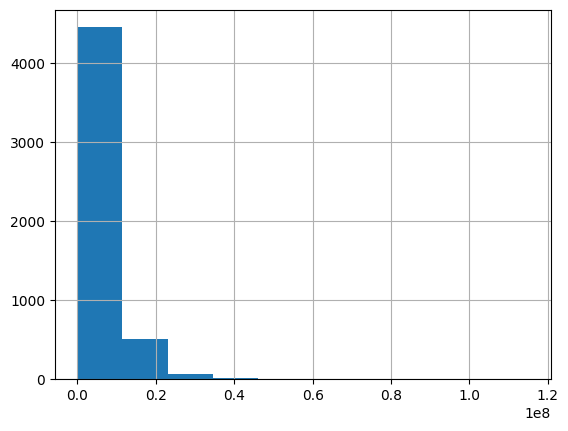

In [11]:
df['salary'].hist()

## Salary outlier

<Axes: xlabel='salary'>

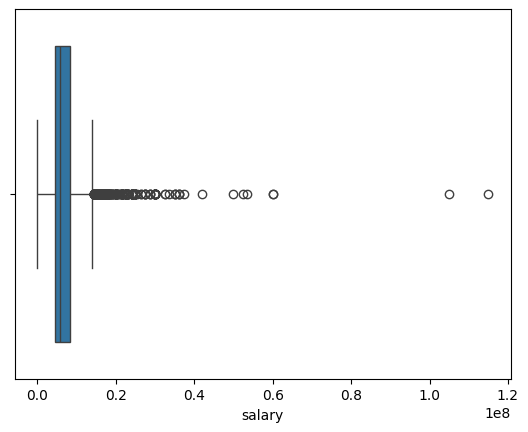

In [12]:
sns.boxplot(x=df['salary'])

## Kolom kategorikal

In [16]:
cols = ['job_title', 'location', 'salary_currency', 'career_level',
        'experience_level', 'education_level', 'employment_type', 'job_function',
        'company_size', 'company_industry', 'company_process_time']

for col in cols:
  print("----------------")
  print(df[col].value_counts().head(5))
  print("\n")

----------------
job_title
Sales Executive     130
Sales Officer        36
Sales                20
Accounting Staff     19
Graphic Designer     18
Name: count, dtype: int64


----------------
location
Jakarta Raya       1001
Jakarta Selatan     432
Jakarta Barat       394
Jakarta Utara       292
Tangerang           285
Name: count, dtype: int64


----------------
salary_currency
IDR    5043
USD       1
Name: count, dtype: int64


----------------
career_level
Pegawai (non-manajemen & non-supervisor)             3317
Supervisor/Koordinator                                908
Manajer/Asisten Manajer                               642
Lulusan baru/Pengalaman kerja kurang dari 1 tahun     140
CEO/GM/Direktur/Manajer Senior                         37
Name: count, dtype: int64


----------------
experience_level
1 tahun    1792
2 tahun    1545
3 tahun     979
5 tahun     503
4 tahun     115
Name: count, dtype: int64


----------------
education_level
Sarjana (S1)                               

## Salary per `job_title`

In [17]:
df.groupby('job_title')['salary'].median().sort_values(ascending=False).head(10)

job_title
Direktur Operasional (Tambang Batubara)    115000000.0
Marketing direktur                         105000000.0
Product Development Manager                 60000000.0
CEO Office                                  60000000.0
Head of Strategic Partnerships              53500000.0
Business Development - KargoNexus           52500000.0
Hospital Executive Director                 50000000.0
Head IT Department                          42000000.0
Dokter Kecantikan Estetika Aesthetic        37500000.0
Internal Audit Sr Manager                   36000000.0
Name: salary, dtype: float64

## Salary per `experience_level`

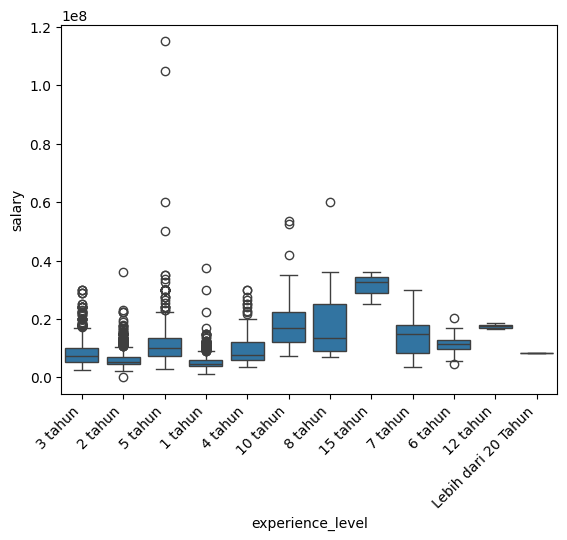

In [18]:
sns.boxplot(data=df, x='experience_level', y='salary')
plt.xticks(rotation=45, ha='right')
plt.show()

## Salary per `company_industry`

In [19]:
df.groupby('company_industry')['salary'].median().sort_values(ascending=False).head(10)

company_industry
Layanan Umum/Tenaga Penggerak                           14400000.0
Hukum/Legal                                             12500000.0
R&D                                                     10000000.0
Manajemen/Konsulting HR                                  9500000.0
Pertambangan                                             8500000.0
Konsultasi (Bisnis & Manajemen)                          8375000.0
Jual Beli Saham/Sekuritas                                7750000.0
Komputer/Teknik Informatika (Perangkat Lunak)            7500000.0
Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)     7500000.0
Keamanan/Penegak hukum                                   7320000.0
Name: salary, dtype: float64

## Salary per `company_size`

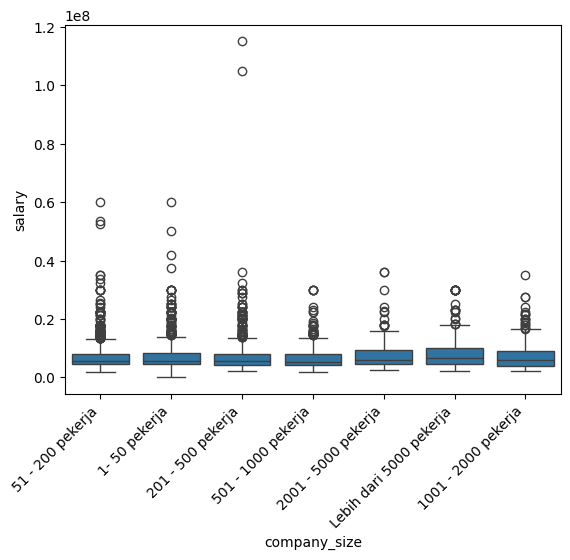

In [20]:
sns.boxplot(data=df, x='company_size', y='salary')
plt.xticks(rotation=45, ha='right')
plt.show()

## Wordcloud

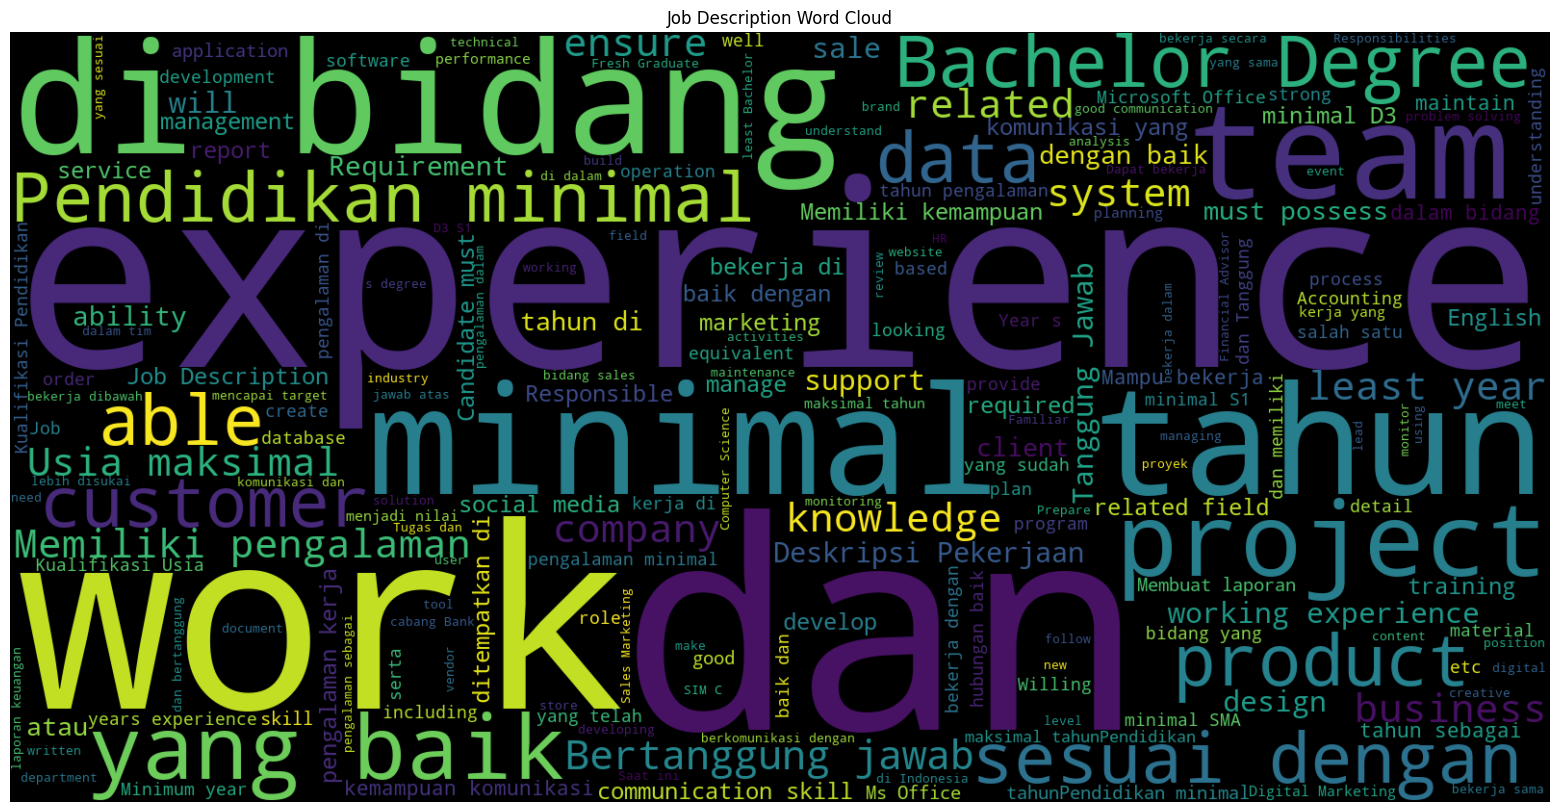

In [21]:
text = ' '.join(df['job_description'])
word_cloud = WordCloud(width=1600, height=800).generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Description Word Cloud')
plt.show()

This part should be running after converting job_description into bahasa

In [22]:
id_stopwords = []

with open('indonesian-stopwords-complete.txt', 'r') as file:
  id_stopwords = file.read().splitlines()

id_stopwords

tfidf = TfidfVectorizer(stop_words='english', max_features=50)
features = tfidf.fit_transform(df['job_description'])
tfidf.get_feature_names_out()

array(['atau', 'baik', 'bekerja', 'bidang', 'business', 'communication',
       'customer', 'dalam', 'dan', 'dari', 'data', 'degree', 'dengan',
       'design', 'di', 'experience', 'good', 'jawab', 'kemampuan',
       'kerja', 'kualifikasi', 'laporan', 'management', 'marketing',
       'melakukan', 'membuat', 'memiliki', 'minimal', 'pekerjaan',
       'pendidikan', 'pengalaman', 'penjualan', 'perusahaan', 'produk',
       'project', 'related', 's1', 'sales', 'sebagai', 'secara', 'sesuai',
       'skills', 'tahun', 'target', 'team', 'untuk', 'work', 'working',
       'yang', 'years'], dtype=object)

# Skill Extraction

## Lower `job_description`

In [23]:
df['job_description'] = df['job_description'].str.lower()
df.head()

id                                  job_title       location  \
9   10                             Tax Supervisor         Banten   
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   

   salary_currency                              career_level experience_level  \
9              IDR                    Supervisor/Koordinator          3 tahun   
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   

                                      education_level employment_type  \
9   Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   

                                         job_function  \
9                  Akuntansi / Keuangan,Audit & Pajak   
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits  ...       company_size  \
9   Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...   51 - 200 pekerja   
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...  ...      1- 50 pekerja   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...  ...   51 - 200 pekerja   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...  ...  201 - 500 pekerja   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...      1- 50 pekerja   

                                     company_industry  \
9                          Konstruksi/Bangunan/Teknik   
22                            Elektrikal & Elektronik   
26  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31                                Manufaktur/Produksi   
34      Komputer/Teknik Informatika (Perangkat Lunak)   

                                      job_description      salary  \
9   responsibilitiesprepare corporate income tax (...   8000000.0   
22  deskripsi pekerjaan:mampu melakukan rencana pe...   5250000.0   
26  scope of role :to plan, develop, implement and...  15000000.0   
31  tanggung jawab:membuat perencanaan produksi be...   6600000.0   
34  kualifikasi:kandidat harus memiliki setidaknya...   9500000.0   

                                       education_list  \
9   [Sertifikat Professional, D3 (Diploma), D4 (Di...   
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   

                  education_multi_hot experience_level_num company_size_ord  \
9   [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    3                2   
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2                1   
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2                2   
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5                3   
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2                1   

    employment_list employment_multi_hot  
9     [Penuh Waktu]         [1, 0, 0, 0]  
22    [Penuh Waktu]         [1, 0, 0, 0]  
26    [Penuh Waktu]         [1, 0, 0, 0]  
31    [Penuh Waktu]         [1, 0, 0, 0]  
34    [Penuh Waktu]         [1, 0, 0, 0]  

[5 r

## Remove digit

In [24]:
df['job_description']=df['job_description'].apply(lambda x: re.sub(r'\w*\d\w*',' ', x))
df.head()

id                                  job_title       location  \
9   10                             Tax Supervisor         Banten   
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   

   salary_currency                              career_level experience_level  \
9              IDR                    Supervisor/Koordinator          3 tahun   
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   

                                      education_level employment_type  \
9   Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   

                                         job_function  \
9                  Akuntansi / Keuangan,Audit & Pajak   
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits  ...       company_size  \
9   Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...   51 - 200 pekerja   
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...  ...      1- 50 pekerja   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...  ...   51 - 200 pekerja   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...  ...  201 - 500 pekerja   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...      1- 50 pekerja   

                                     company_industry  \
9                          Konstruksi/Bangunan/Teknik   
22                            Elektrikal & Elektronik   
26  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31                                Manufaktur/Produksi   
34      Komputer/Teknik Informatika (Perangkat Lunak)   

                                      job_description      salary  \
9   responsibilitiesprepare corporate income tax (...   8000000.0   
22  deskripsi pekerjaan:mampu melakukan rencana pe...   5250000.0   
26  scope of role :to plan, develop, implement and...  15000000.0   
31  tanggung jawab:membuat perencanaan produksi be...   6600000.0   
34  kualifikasi:kandidat harus memiliki setidaknya...   9500000.0   

                                       education_list  \
9   [Sertifikat Professional, D3 (Diploma), D4 (Di...   
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   

                  education_multi_hot experience_level_num company_size_ord  \
9   [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    3                2   
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2                1   
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2                2   
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5                3   
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2                1   

    employment_list employment_multi_hot  
9     [Penuh Waktu]         [1, 0, 0, 0]  
22    [Penuh Waktu]         [1, 0, 0, 0]  
26    [Penuh Waktu]         [1, 0, 0, 0]  
31    [Penuh Waktu]         [1, 0, 0, 0]  
34    [Penuh Waktu]         [1, 0, 0, 0]  

[5 r

## Remove punctuation

In [25]:
df['job_description']=df['job_description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
df.head()

id                                  job_title       location  \
9   10                             Tax Supervisor         Banten   
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   

   salary_currency                              career_level experience_level  \
9              IDR                    Supervisor/Koordinator          3 tahun   
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   

                                      education_level employment_type  \
9   Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   

                                         job_function  \
9                  Akuntansi / Keuangan,Audit & Pajak   
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits  ...       company_size  \
9   Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...   51 - 200 pekerja   
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...  ...      1- 50 pekerja   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...  ...   51 - 200 pekerja   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...  ...  201 - 500 pekerja   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...      1- 50 pekerja   

                                     company_industry  \
9                          Konstruksi/Bangunan/Teknik   
22                            Elektrikal & Elektronik   
26  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31                                Manufaktur/Produksi   
34      Komputer/Teknik Informatika (Perangkat Lunak)   

                                      job_description      salary  \
9   responsibilitiesprepare corporate income tax  ...   8000000.0   
22  deskripsi pekerjaan mampu melakukan rencana pe...   5250000.0   
26  scope of role  to plan  develop  implement and...  15000000.0   
31  tanggung jawab membuat perencanaan produksi be...   6600000.0   
34  kualifikasi kandidat harus memiliki setidaknya...   9500000.0   

                                       education_list  \
9   [Sertifikat Professional, D3 (Diploma), D4 (Di...   
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   

                  education_multi_hot experience_level_num company_size_ord  \
9   [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    3                2   
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2                1   
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2                2   
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5                3   
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2                1   

    employment_list employment_multi_hot  
9     [Penuh Waktu]         [1, 0, 0, 0]  
22    [Penuh Waktu]         [1, 0, 0, 0]  
26    [Penuh Waktu]         [1, 0, 0, 0]  
31    [Penuh Waktu]         [1, 0, 0, 0]  
34    [Penuh Waktu]         [1, 0, 0, 0]  

[5 r

## Remove extra spaces

In [26]:
df['job_description']=df['job_description'].apply(lambda x: re.sub(' +',' ',x))
df.head()

id                                  job_title       location  \
9   10                             Tax Supervisor         Banten   
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   

   salary_currency                              career_level experience_level  \
9              IDR                    Supervisor/Koordinator          3 tahun   
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   

                                      education_level employment_type  \
9   Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   

                                         job_function  \
9                  Akuntansi / Keuangan,Audit & Pajak   
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits  ...       company_size  \
9   Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...   51 - 200 pekerja   
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...  ...      1- 50 pekerja   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...  ...   51 - 200 pekerja   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...  ...  201 - 500 pekerja   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...      1- 50 pekerja   

                                     company_industry  \
9                          Konstruksi/Bangunan/Teknik   
22                            Elektrikal & Elektronik   
26  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31                                Manufaktur/Produksi   
34      Komputer/Teknik Informatika (Perangkat Lunak)   

                                      job_description      salary  \
9   responsibilitiesprepare corporate income tax c...   8000000.0   
22  deskripsi pekerjaan mampu melakukan rencana pe...   5250000.0   
26  scope of role to plan develop implement and me...  15000000.0   
31  tanggung jawab membuat perencanaan produksi be...   6600000.0   
34  kualifikasi kandidat harus memiliki setidaknya...   9500000.0   

                                       education_list  \
9   [Sertifikat Professional, D3 (Diploma), D4 (Di...   
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   

                  education_multi_hot experience_level_num company_size_ord  \
9   [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    3                2   
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2                1   
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2                2   
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5                3   
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2                1   

    employment_list employment_multi_hot  
9     [Penuh Waktu]         [1, 0, 0, 0]  
22    [Penuh Waktu]         [1, 0, 0, 0]  
26    [Penuh Waktu]         [1, 0, 0, 0]  
31    [Penuh Waktu]         [1, 0, 0, 0]  
34    [Penuh Waktu]         [1, 0, 0, 0]  

[5 r

In [27]:
for index,text in enumerate(df['job_description'][35:40]):
  print('Description %d:\n'%(index+1),text)

Description 1:
 responsibilities organizing materials and ensuring sites are safe and clean preparing cost estimates and ensuring appropriate materials and tools are available providing technical advice and suggestions for improvement on particular projects diagnosing and troubleshooting equipment as required negotiating with suppliers and vendors to ensure the best contracts authorizing technical drawings and engineering plans drawing up work schedules and communicating any adjustments to crew members and clients gathering data compiling reports and delivering presentations to relevant stakeholders delegating tasks and scheduling meetings and training sessions where required completing quality assurance and providing feedback to the team 
Description 2:
 requirement maximum years admin psychology or law minimum years experience in related positiongood knowledge about human resource especially in hr policy procedures job description sop performance appraisal hris filling documentmaster

## Convert `job_description` ke bahasa inggris

In [30]:
df_new = df.iloc[1:11]

translator = Translator(to_lang="en")

def safe_translate(text, chunk_size=500):
    chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    translated_chunks = []

    for c in chunks:
      try:
        translated_chunks.append(translator.translate(c))
      except:
        translated_chunks.append(c)
        # continue

    return " ".join(translated_chunks)

df_new['deskripsi pekerjaan'] = df_new['job_description'].apply(safe_translate)
df_new.head()

/var/folders/2x/6ysp6yr56c3017xsg0jb_l480000gn/T/ipykernel_38918/3025473298.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['deskripsi pekerjaan'] = df_new['job_description'].apply(safe_translate)


id                                  job_title       location  \
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   
37  38                IT Software Developer Staff  Jakarta Barat   

   salary_currency                              career_level experience_level  \
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   
37             IDR  Pegawai (non-manajemen & non-supervisor)          1 tahun   

                                      education_level employment_type  \
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   
37  Sarjana (S1), Diploma Pascasarjana, Gelar Prof...     Penuh Waktu   

                                         job_function  \
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   
37    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits  ...  \
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...  ...   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...  ...   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...  ...   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...   
37  Kasual (contoh: Kaos);Senin - Jum'at (HO) Seni...  ...   

                                     company_industry  \
22                            Elektrikal & Elektronik   
26  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...   
31                                Manufaktur/Produksi   
34      Komputer/Teknik Informatika (Perangkat Lunak)   
37                     Industri Berat/Mesin/Peralatan   

                                      job_description      salary  \
22  deskripsi pekerjaan mampu melakukan rencana pe...   5250000.0   
26  scope of role to plan develop implement and me...  15000000.0   
31  tanggung jawab membuat perencanaan produksi be...   6600000.0   
34  kualifikasi kandidat harus memiliki setidaknya...   9500000.0   
37  bachelor’s degree of information technology or...   6800000.0   

                                       education_list  \
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   
37  [Sarjana (S1), Diploma Pascasarjana, Gelar Pro...   

                  education_multi_hot experience_level_num company_size_ord  \
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2                1   
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2                2   
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5                3   
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2                1   
37  [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]                    1                4   

   employment_list  employment_multi_hot  \
22   [Penuh Waktu]          [1, 0, 0, 0]   
26   [Penuh Waktu]          [1, 0, 0, 0]   
31   [Penuh Waktu]          [1, 0, 0, 0]   
34   [Penuh Waktu]          [1, 0, 0, 0]   
37   [Penuh Waktu]          [1, 0, 0, 0]   

                                  deskripsi pekerjaan  
22  job description being able to make a purchase ...  


## Extract skill

In [31]:
nlp = spacy.load("en_core_web_lg")
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

def extract_doc_node_values(annotation_result):
  if not isinstance(annotation_result, dict) or 'results' not in annotation_result:
    return []

  doc_node_values = []
  results = annotation_result['results']

  if 'full_matches' in results:
    for match in results['full_matches']:
      doc_node_values.append(match['doc_node_value'])

  # if 'ngram_scored' in results:
  #   for match in results['ngram_scored']:
  #     doc_node_values.append(match['doc_node_value'])

  return doc_node_values

df_new['annotations'] = df_new['deskripsi pekerjaan'].apply(lambda x: skill_extractor.annotate(x))
df_new['skills'] = df_new['annotations'].apply(extract_doc_node_values)

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skillNer/utils.py:99: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  vec_similarity = token1.similarity(token2)
/var/folders/2x/6ysp6yr56c3017xsg0jb_l480000gn/T/ipykernel_38918/1450775226.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['annotations'] = df_new['deskripsi pekerjaan'].apply(lambda x: skill_extractor.annotate(x))
/var/folders/2x/6ysp6yr56c3017xsg0jb_l480000gn/T/ipykernel_38918/1450775226.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [32]:
df_new.head()

id                                  job_title       location  \
22  23                    Senior Staff Purchasing       Surabaya   
26  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
31  32                                       PPIC      Tangerang   
34  35               C# Advanced/Senior Developer  Jakarta Timur   
37  38                IT Software Developer Staff  Jakarta Barat   

   salary_currency                              career_level experience_level  \
22             IDR  Pegawai (non-manajemen & non-supervisor)          2 tahun   
26             IDR                   Manajer/Asisten Manajer          2 tahun   
31             IDR                   Manajer/Asisten Manajer          5 tahun   
34             IDR                    Supervisor/Koordinator          2 tahun   
37             IDR  Pegawai (non-manajemen & non-supervisor)          1 tahun   

                                      education_level employment_type  \
22  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   
26                               Tidak terspesifikasi     Penuh Waktu   
31                                       Sarjana (S1)     Penuh Waktu   
34  SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...     Penuh Waktu   
37  Sarjana (S1), Diploma Pascasarjana, Gelar Prof...     Penuh Waktu   

                                         job_function  \
22            Manufaktur,Pembelian/Manajemen Material   
26  Penjualan / Pemasaran,Pemasaran/Pengembangan B...   
31                              Manufaktur,Manufaktur   
34    Komputer/Teknologi Informasi,IT-Perangkat Lunak   
37    Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                         job_benefits  ...      salary  \
22  Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...  ...   5250000.0   
26  Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...  ...  15000000.0   
31  Asuransi kesehatan;Waktu regular, Senin - Juma...  ...   6600000.0   
34  Tip;Asuransi kesehatan;Waktu regular, Senin - ...  ...   9500000.0   
37  Kasual (contoh: Kaos);Senin - Jum'at (HO) Seni...  ...   6800000.0   

                                       education_list  \
22  [Sertifikat Professional, D3 (Diploma), D4 (Di...   
26                             [Tidak terspesifikasi]   
31                                     [Sarjana (S1)]   
34  [SMA, SMU/SMK/STM, Sertifikat Professional, D3...   
37  [Sarjana (S1), Diploma Pascasarjana, Gelar Pro...   

                  education_multi_hot experience_level_num  company_size_ord  \
22  [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]                    2                 1   
26  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]                    2                 2   
31  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]                    5                 3   
34  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]                    2                 1   
37  [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]                    1                 4   

   employment_list employment_multi_hot  \
22   [Penuh Waktu]         [1, 0, 0, 0]   
26   [Penuh Waktu]         [1, 0, 0, 0]   
31   [Penuh Waktu]         [1, 0, 0, 0]   
34   [Penuh Waktu]         [1, 0, 0, 0]   
37   [Penuh Waktu]         [1, 0, 0, 0]   

                                  deskripsi pekerjaan  \
22  job description being able to make a purchase ...   
26  scope of role to plan develop implement and me...   
31  responsibility for making production planning ...   
34  qualifications candidates must have at least a...   
37  bachelor’s degree of information technology or...   

                                          annotations  \
22  {'text': 'job description being able to make a...   
26  {'text': 'scope of role to plan develop implem...   
31  {'text': 'responsibility for making production...   
34  {'text': 'qualifications candidates must have ...   
37  {'text': 'bachelor’s degree of information tec...   

                                               skills  
22                [job description, microsoft office]  


In [33]:
skill_extractor.describe(df_new.iloc[2]['annotations'])

In [34]:
from huggingface_hub import snapshot_download
import spacy

# Download the model from the Hub
model_path = snapshot_download("amjad-awad/skill-extractor", repo_type="model")

def extract_skills_spacy(text):
    """
    Extract SKILLS entities from job description text using spaCy model.
    Returns list of skill names.
    """
    if pd.isna(text) or text.strip() == "":
        return []

    doc = nlp(text)
    return [ent.text for ent in doc.ents if "SKILLS" in ent.label_]

# Apply to entire dataframe column
df_new['extracted_skills'] = df_new['deskripsi pekerjaan'].apply(extract_skills_spacy)
df_new[['deskripsi pekerjaan', 'extracted_skills']].head()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

meta.json: 0.00B [00:00, ?B/s]

moves:   0%|          | 0.00/596 [00:00<?, ?B/s]

config.cfg: 0.00B [00:00, ?B/s]

cfg:   0%|          | 0.00/6.00 [00:00<?, ?B/s]

model:   0%|          | 0.00/176k [00:00<?, ?B/s]

cfg:   0%|          | 0.00/233 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

lookups.bin:   0%|          | 0.00/1.00 [00:00<?, ?B/s]

model:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

strings.json:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

vectors:   0%|          | 0.00/412M [00:00<?, ?B/s]

key2row:   0%|          | 0.00/9.31M [00:00<?, ?B/s]

vectors.cfg:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

tokenizer: 0.00B [00:00, ?B/s]

/var/folders/2x/6ysp6yr56c3017xsg0jb_l480000gn/T/ipykernel_38918/3609000610.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['extracted_skills'] = df_new['deskripsi pekerjaan'].apply(extract_skills_spacy)


deskripsi pekerjaan extracted_skills
22  job description being able to make a purchase ...               []
26  scope of role to plan develop implement and me...               []
31  responsibility for making production planning ...               []
34  qualifications candidates must have at least a...               []
37  bachelor’s degree of information technology or...               []

In [35]:
for index,text in enumerate(df_new['extracted_skills'][1:10]):
  print('Description %d:\n'%(index+1),text)

Description 1:
 []
Description 2:
 []
Description 3:
 []
Description 4:
 []
Description 5:
 []
Description 6:
 []
Description 7:
 []
Description 8:
 []
Description 9:
 []


In [40]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]






00%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.26it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]